<a href="https://colab.research.google.com/github/luiscfcorreia/copacabana-project/blob/main/ETFs_Portfolio_Reinvested_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 High Yield ETFs: Total Return with Reinvested Dividends
This Colab notebook:
- Loads historical close prices & dividends
- Calculates growth of $10,000 invested with dividends reinvested
- Computes Total Return %, CAGR, Volatility, Max Drawdown
- Plots portfolio growth over time

O objetivo geral desse notebook, é fazer um estudo do comportamento dos 65 ETF High Income que temos no mercado americano. Tais fundos utilizam o lançamento coberto de opções com o intuito de capturar os altos premios, possibilitados pela alta na volatilidade implícita de tais ativos. De modo a contornar o alto custo de possuir tais ativos em carteira, ex META 700$, MSTR $400US , QQQ 550$, esses fundos utilizam tambem a estrategia de "poor man call" para garantir a execucao das operacoes.

In [2]:
!pip install yfinance --upgrade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.64
    Uninstalling yfinance-0.2.64:
      Successfully uninstalled yfinance-0.2.64


Criei uma lista com todos os ETFs a serem utilizados, e defini como corte temporal o 2Q de 2025

In [4]:
# Single flat list with all ETFs
etf_list = [
    'FIAT', 'PLTY', 'CRSH', 'SNOY', 'MSTY', 'TSLY',
    'SMCY', 'MARO', 'CONY', 'CVNY', 'AIYY', 'ULTY',
    'NVDY', 'MRNY', 'TSLW', 'XYZY', 'DIPS', 'PLTW',
    'WNTR', 'YMAX', 'AMDY', 'LFGY', 'YBIT', 'IWMY',
    'YMAG', 'TSMY', 'GDXY', 'USOY', 'AMZY', 'OARK',
    'FEAT', 'ABNY', 'PYPY', 'NFLY', 'QQQY', 'GLDY',
    'COIW', 'FBY', 'YETH', 'NVDW', 'RDTY', 'DISO',
    'APLY', 'YBTC', 'GOOY', 'WDTE', 'MSFO', 'YQQQ',
    'CHPY', 'QDTE', 'QDTY', 'AAPW', 'XOMO', 'GPTY',
    'FIVY', 'XDTE', 'SDTY', 'JPMO', 'XPAY', 'SPYT',
    'QQQT', 'MAGY', 'SOXY', 'BIGY', 'WEEK'
]

# Download all data in one go
print("Downloading all ETFs...")
data = yf.download(etf_list, start='2025-04-01', end='2025-06-30', progress=True)
close_prices = data['Close']

# Check available data counts
counts = close_prices.count()
print("\nData counts per ETF:")
print(counts.sort_values())

/tmp/ipython-input-4-855328430.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(etf_list, start='2025-04-01', end='2025-06-30', progress=True)
[                       0%                       ]

[*********************100%***********************]  65 of 65 completed


Data counts per ETF:
Ticker
MAGY    46
BIGY    56
CHPY    56
GLDY    60
AMDY    61
        ..
YBTC    61
YETH    61
YMAG    61
YMAX    61
YQQQ    61
Length: 65, dtype: int64


Nessa célula é onde eu insiro a planilha de dividendos que eu mesmo coletei manualmente os dados a serem utilizados no estudo.

In [6]:
# 🗂️ Load your data files from local or Colab files tab
# Adjust the filenames below as needed
dividends_df = pd.read_csv('/content/dividends.csv', index_col=0, parse_dates=True)

# Convert dividend strings like '0,275' to float 0.275
dividends_df = dividends_df.replace(',', '.', regex=True).astype(float)

# Transpose and sort the index of dividends_df and convert index to datetime
dividends_df_transposed = dividends_df.T
dividends_df_transposed.index = pd.to_datetime(dividends_df_transposed.index, format='%d/%m/%Y')
dividends_df_transposed = dividends_df_transposed.sort_index()

# Align dividends to trading days
dividends_df_aligned = dividends_df_transposed.reindex(close_prices.index, method='ffill').fillna(0)

/tmp/ipython-input-6-3683839759.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dividends_df = pd.read_csv('/content/dividends.csv', index_col=0, parse_dates=True)


Simulei um investimento inicial de $10.000 em cada etf, e depois o reinvestimento dos seus dividendos pagos

In [8]:
# 🚀 Reinvest dividends and track portfolio value over time
initial_investment = 10000
shares_held = initial_investment / close_prices.iloc[0]
portfolio_values = pd.DataFrame(index=close_prices.index, columns=close_prices.columns)

for date in close_prices.index:
    prices_today = close_prices.loc[date]
    dividends_today = dividends_df_aligned.loc[date]
    new_shares = (shares_held * dividends_today) / prices_today
    shares_held += new_shares.fillna(0)
    portfolio_values.loc[date] = shares_held * prices_today

Nas duas celulas abaixo, são plotados os resultados obtidos em cada portifolio. Ficaria melhor se conseguisse dividir em grupos de 6 ETFs para facilitar a visualização, cheguei a fazer isso anteriormente mas depois complicou em etapas futuras

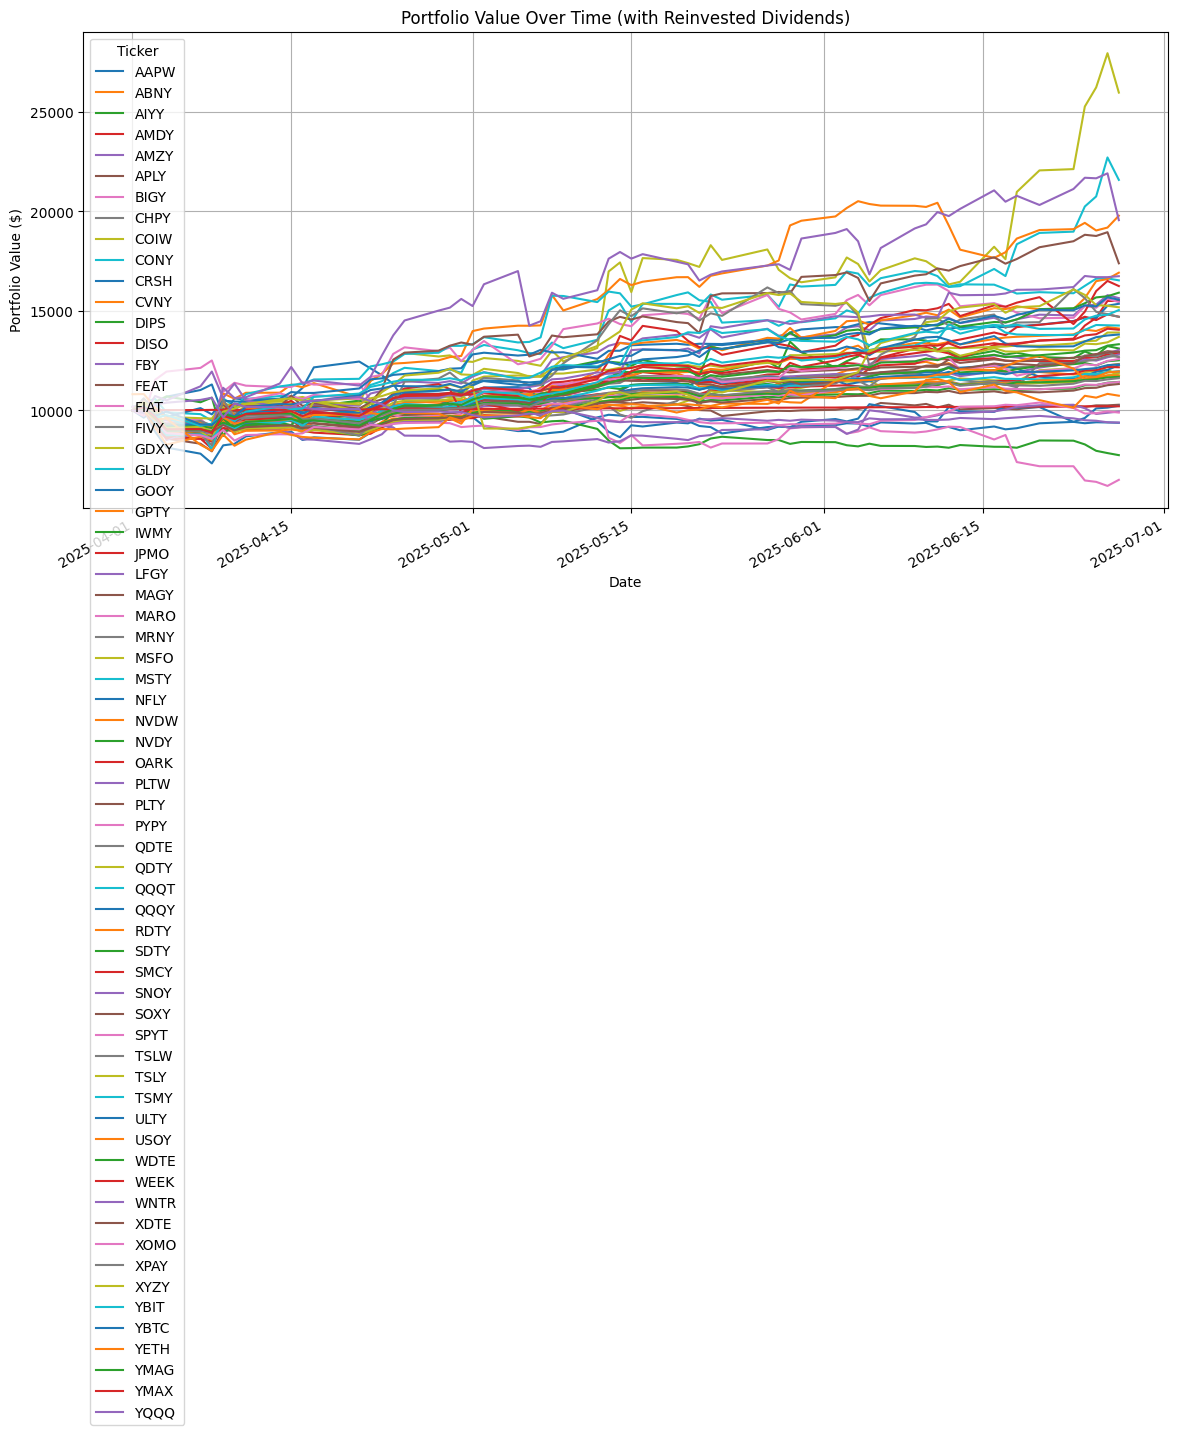

In [9]:
# 📈 Plot portfolio value over time
portfolio_values.plot(figsize=(14,7), title="Portfolio Value Over Time (with Reinvested Dividends)")
plt.ylabel("Portfolio Value ($)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

In [10]:
# 📝 Compute summary metrics
days = (portfolio_values.index[-1] - portfolio_values.index[0]).days
years = days / 365.25

total_return = (portfolio_values.iloc[-1] / initial_investment - 1) * 100
cagr = ((portfolio_values.iloc[-1] / initial_investment) ** (1/years) - 1) * 100
volatility = portfolio_values.pct_change().std() * np.sqrt(252) * 100

# Max Drawdown
roll_max = portfolio_values.cummax()
drawdowns = (portfolio_values - roll_max) / roll_max
max_drawdown = drawdowns.min() * 100

# 📝 Summary table
summary = pd.DataFrame({
    'Total Return %': total_return.round(2),
    'CAGR %': cagr.round(2),
    'Volatility %': volatility.round(2),
    'Max Drawdown %': max_drawdown.round(2)
})

print("Summary Statistics:")
display(summary.sort_values('Total Return %', ascending=False))

Summary Statistics:


/tmp/ipython-input-10-4279346539.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility = portfolio_values.pct_change().std() * np.sqrt(252) * 100
/tmp/ipython-input-10-4279346539.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  volatility = portfolio_values.pct_change().std() * np.sqrt(252) * 100


,Total Return %,CAGR %,Volatility %,Max Drawdown %
Ticker,,,,
COIW,159.781163,5403.479076,111.07,-20.107636
CONY,115.88644,2430.289885,64.26,-10.38781
CVNY,97.888047,1655.703161,68.44,-17.417113
PLTW,95.639745,1573.467387,96.14,-18.400511
PLTY,73.947821,921.751423,69.28,-13.746817
...,...,...,...,...
FIAT,-34.920234,-83.526162,85.29,-50.419471
BIGY,NaN,NaN,NaN,NaN
CHPY,NaN,NaN,NaN,NaN


In [11]:
# 🔎 Rank each metric
summary['Return Rank'] = summary['Total Return %'].rank(ascending=False)
summary['CAGR Rank'] = summary['CAGR %'].rank(ascending=False)
summary['Volatility Rank'] = summary['Volatility %'].rank(ascending=True)
summary['Drawdown Rank'] = summary['Max Drawdown %'].rank(ascending=True)

# ⚖️ Compute combined total score
summary['Total Score'] = (
    summary['Return Rank'] * 0.04 +
    summary['CAGR Rank'] * 0.03 +
    summary['Volatility Rank'] * 0.03 +
    summary['Drawdown Rank'] * 0.9
)

# 🥇 Select top 5 ETFs by total score
top_5 = summary.sort_values('Total Score').head(20)

print("🎯 Top 5 ETFs considering Total Return, CAGR, Volatility and Drawdown:")
display(top_5[['Total Return %', 'CAGR %', 'Volatility %', 'Max Drawdown %', 'Total Score']])


🎯 Top 5 ETFs considering Total Return, CAGR, Volatility and Drawdown:


,Total Return %,CAGR %,Volatility %,Max Drawdown %,Total Score
Ticker,,,,,
FIAT,-34.920234,-83.526162,85.29,-50.419471,6.91
WNTR,-0.600105,-2.495333,56.05,-32.184303,6.98
CRSH,2.319139,10.10365,66.98,-30.567081,8.01
TSLW,47.030523,404.455511,100.36,-24.541558,8.53
MSTY,65.379501,726.506655,72.97,-21.389396,8.57
DIPS,-22.500343,-65.703489,56.36,-27.6166,9.09
AAPW,-6.240487,-23.702082,53.48,-27.019774,9.86
COIW,159.781163,5403.479076,111.07,-20.107636,10.90
APLY,2.848001,12.512705,46.22,-21.066497,11.99


Nesse ranking acima eu estou com dificuldade de criar, o peso maior deve ser para o ETF que tenha o menor drawdown, menor volatilidade e maior CAGR e mairo retorno. Tentei mas ele só está associando em ordem crescente de drawdown e volatilidade.